# Configuração do ambiente

In [47]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
from sklearn.cluster import KMeans
import config
import util_designite

# Files and Commits

### Dado o conjunto de commits abaixo e seus respectivos arquivos: 

C1 -> [F1, F2]

C2 -> [**F2, F3**]

C3 -> [**F2, F3, F4**]

C4 -> [**F2, F3**, F5]

C5 -> [F6, F7, F8, F9]

C6 -> [**F2, F3, F4**, F10]

Os seguintes conjuntos se repetem em mais de um commit: (F2, F3) e (F2, F3, F4)

In [48]:
# Lista de arquivos analisados
files = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']

# Lista de arquivos que aparecem em cada commit
c1 = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
c2 = [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
c3 = [0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
c4 = [0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
c5 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
c6 = [0, 1, 1, 1, 0, 0, 0, 0, 0, 1]

### Daframe que representa a relação entre arquivos e commits

In [49]:
df_files_commits = pd.DataFrame.from_dict({'file': files, 'c1':c1, 'c2':c2, 'c3':c3, 'c4':c4, 'c5':c5, 'c6':c6})
df_files_commits

,file,c1,c2,c3,c4,c5,c6
0,f1,1,0,0,0,0,0
1,f2,1,1,1,1,0,1
2,f3,0,1,1,1,0,1
3,f4,0,0,1,0,0,1
4,f5,0,0,0,1,0,0
5,f6,0,0,0,0,1,0
6,f7,0,0,0,0,1,0
7,f8,0,0,0,0,1,0
8,f9,0,0,0,0,1,0
9,f10,0,0,0,0,0,1


### Dados dos commits que serão analisados

In [50]:
X = df_files_commits[['c1', 'c2', 'c3', 'c4', 'c5', 'c6']]
X

,c1,c2,c3,c4,c5,c6
0,1,0,0,0,0,0
1,1,1,1,1,0,1
2,0,1,1,1,0,1
3,0,0,1,0,0,1
4,0,0,0,1,0,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,0,1,0
8,0,0,0,0,1,0
9,0,0,0,0,0,1


### Elbow Method
The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for 𝐾

In [51]:
def elbow_method(X, range_from, range_to):
  # calculate distortion for a range of number of cluster
  distortions = []
  for i in range(range_from, range_to):
    km = KMeans(i)
    km.fit(X)
    distortions.append(km.inertia_)
  # plot
  plt.plot(range(range_from, range_to), distortions, marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Distortion')
  plt.show()

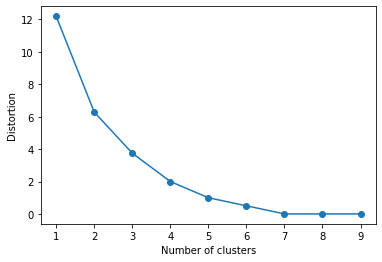

In [52]:
elbow_method(X, 1, 10)

## Para k=5

In [53]:
kmeans = KMeans(5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Identificação dos clusters

In [54]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 3, 3, 2, 4, 1, 1, 1, 1, 2], dtype=int32)

In [55]:
data_with_clusters = df_files_commits.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters.sort_values(['cluster'])

,file,c1,c2,c3,c4,c5,c6,cluster
0,f1,1,0,0,0,0,0,0
5,f6,0,0,0,0,1,0,1
6,f7,0,0,0,0,1,0,1
7,f8,0,0,0,0,1,0,1
8,f9,0,0,0,0,1,0,1
3,f4,0,0,1,0,0,1,2
9,f10,0,0,0,0,0,1,2
1,f2,1,1,1,1,0,1,3
2,f3,0,1,1,1,0,1,3
4,f5,0,0,0,1,0,0,4


### Mostra os grupos encontrados

In [56]:
def mostra_grupos(list_of_clusters, data_with_clusters):
  dictionary_of_clusters = {}
  list_of_groups = []
  for cluster in list_of_clusters:
    for index, row in data_with_clusters.iterrows():
      if cluster == row['cluster']:
        list_of_groups.append(row['file'])
    dictionary_of_clusters[cluster] = list_of_groups
    list_of_groups = []
    
  for k, v in dictionary_of_clusters.items():
    print(f'grupo {k} : {v}')
    
  return dictionary_of_clusters

In [57]:
list_of_clusters = list(data_with_clusters['cluster'])
list_of_clusters = list(set(list_of_clusters))
print(list_of_clusters)
dictionary_of_clusters = mostra_grupos(list_of_clusters, data_with_clusters)

[0, 1, 2, 3, 4]
grupo 0 : ['f1']
grupo 1 : ['f6', 'f7', 'f8', 'f9']
grupo 2 : ['f4', 'f10']
grupo 3 : ['f2', 'f3']
grupo 4 : ['f5']


# Teste com dados reais

## Dataframe com os commits e arquivos modificados na versão 3.11.11 do Cassandra

In [69]:
df_files_commits_real = pd.read_csv('df_files_commits.csv', sep=',')
df_files_commits_real.head(10)

,file,b11fba750c610de5e97acba070cc571cf0a96416,1db386e46e451250b2375060f92093f670091c02,557bbbccb0eddc9f2ba6431b023b3ded253de056,a55fd76ddd96e3ed2d967910f0572804fcfacc2f,2cd18ef5a01a06d90e13e61971e5601c7de61e7c,47341eb6aaca318d0ffc0e9f906b98db50b9e9ff,e2c6341898fa43b0e262ef031f267587050b8d0f,313d9c9b530d03ff750220f275e4691c2af6ce3c,a37f8becf2d5df2895febbd8ec0cbd8ba793be8f,...,25dbbfddc2e0a7a777dd48ec7ff3e8198d6719bd,23b034878972042201be4e19116683eb40de86a8,8d881d994f9dd7c7292c309ef0dcf9131962a48f,b604bd20cde2a47ed375c1460da4f05182dbd037,87645a9256a96f4c528574f48ccf211c0d75272d,92773f8f2d88e6ff8ee7b2d913f56215aecb91aa,85de9a05cbdd01ee905d41e16ae8b1d88bf1c7e7,e5bc2574a59384dd32133df6dd151e9d5e8f2aed,27de93ebb1285e731570eb8585d66832c79c4289,4cafe2288e56e1135d65e76adbcd6c2de9306d6b
0,StorageService.java,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ColumnFamilyStore.java,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DatabaseDescriptor.java,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CompactionManager.java,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,StorageProxy.java,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,SSTableReader.java,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Config.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CassandraDaemon.java,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,SelectStatement.java,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,LegacyLayout.java,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_files_commits_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Columns: 5561 entries, file to 4cafe2288e56e1135d65e76adbcd6c2de9306d6b
dtypes: int64(5560), object(1)
memory usage: 1.6+ MB


## Commits analisados

In [60]:
X_commits = df_files_commits_real.iloc[:, 1:5561]
X_commits

,b11fba750c610de5e97acba070cc571cf0a96416,1db386e46e451250b2375060f92093f670091c02,557bbbccb0eddc9f2ba6431b023b3ded253de056,a55fd76ddd96e3ed2d967910f0572804fcfacc2f,2cd18ef5a01a06d90e13e61971e5601c7de61e7c,47341eb6aaca318d0ffc0e9f906b98db50b9e9ff,e2c6341898fa43b0e262ef031f267587050b8d0f,313d9c9b530d03ff750220f275e4691c2af6ce3c,a37f8becf2d5df2895febbd8ec0cbd8ba793be8f,9acf58801382cf1d3b4223c6191d729b58440564,...,25dbbfddc2e0a7a777dd48ec7ff3e8198d6719bd,23b034878972042201be4e19116683eb40de86a8,8d881d994f9dd7c7292c309ef0dcf9131962a48f,b604bd20cde2a47ed375c1460da4f05182dbd037,87645a9256a96f4c528574f48ccf211c0d75272d,92773f8f2d88e6ff8ee7b2d913f56215aecb91aa,85de9a05cbdd01ee905d41e16ae8b1d88bf1c7e7,e5bc2574a59384dd32133df6dd151e9d5e8f2aed,27de93ebb1285e731570eb8585d66832c79c4289,4cafe2288e56e1135d65e76adbcd6c2de9306d6b
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


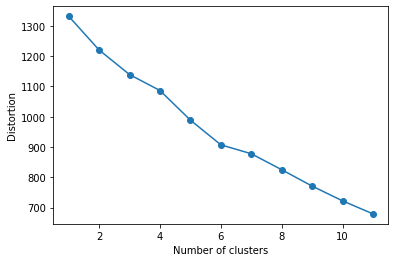

In [61]:
elbow_method(X_commits, 1,12)

## para K=11

In [62]:
kmeans_dados_reais = KMeans(11)
kmeans_dados_reais.fit(X_commits)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
identified_clusters_dados_reais = kmeans_dados_reais.fit_predict(X_commits)
identified_clusters_dados_reais

array([ 4,  6,  5,  1,  0,  6,  3,  1,  1,  9, 10,  9,  3,  3,  3,  8,  8,
        2,  8,  8,  8, 10,  7,  1,  7,  8,  1,  7,  2,  1,  3,  8,  8,  8,
        8,  1,  8], dtype=int32)

In [64]:
data_with_clusters_dados_reais = df_files_commits_real.copy()
data_with_clusters_dados_reais['cluster'] = identified_clusters_dados_reais
data_with_clusters_dados_reais[['file', 'cluster']].sort_values(['cluster'])

,file,cluster
4,StorageProxy.java,0
26,CompactionStrategyManager.java,1
23,SASIIndexTest.java,1
3,CompactionManager.java,1
29,Keyspace.java,1
35,AlterTest.java,1
7,CassandraDaemon.java,1
8,SelectStatement.java,1
28,ColumnIndex.java,2
17,CFMetaData.java,2


## Mostra os grupos encontrados

In [65]:
list_of_clusters_dados_reais = list(data_with_clusters_dados_reais['cluster'])
list_of_clusters_dados_reais = list(set(list_of_clusters_dados_reais))
print(f'Grupos: {list_of_clusters_dados_reais}')

dictionary_of_clusters_dados_reais = mostra_grupos(list_of_clusters_dados_reais, data_with_clusters_dados_reais)

Grupos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
grupo 0 : ['StorageProxy.java']
grupo 1 : ['CompactionManager.java', 'CassandraDaemon.java', 'SelectStatement.java', 'SASIIndexTest.java', 'CompactionStrategyManager.java', 'Keyspace.java', 'AlterTest.java']
grupo 2 : ['CFMetaData.java', 'ColumnIndex.java']
grupo 3 : ['Config.java', 'ReadCommand.java', 'MessagingService.java', 'Instance.java', 'StatementRestrictions.java']
grupo 4 : ['StorageService.java']
grupo 5 : ['DatabaseDescriptor.java']
grupo 6 : ['ColumnFamilyStore.java', 'SSTableReader.java']
grupo 7 : ['StorageServiceMBean.java', 'ModificationStatement.java', 'DataResolver.java']
grupo 8 : ['Gossiper.java', 'CQLTester.java', 'SchemaKeyspace.java', 'SecondaryIndexTest.java', 'ViewTest.java', 'View.java', 'AbstractCluster.java', 'FBUtilities.java', 'QueryProcessor.java', 'SelectTest.java', 'CreateViewStatement.java']
grupo 9 : ['LegacyLayout.java', 'NodeProbe.java']
grupo 10 : ['SinglePartitionReadCommand.java', 'SystemKeyspace.java']


## Dataframe com os 100 arquivos mais modificados na versão 3.11.11 do Cassandra

In [74]:
filepath = util_designite.PATH_ARQUIVOS_MODIFICADOS_V_3_11_11 + '/' + 'df_100_arquivos_mais_modificados.csv'
df_100_arquivos_mais_modificados = pd.read_csv(filepath, sep=',')
colunas = ['name', 'hash', 'date', 'modifications', 'nloc', 'complexity']
df_100_arquivos_mais_modificados[colunas].head(10)

,name,hash,date,modifications,nloc,complexity
0,StorageService.java,6bad57fc3cf967838a220d8402db37ed9a5b3b4e,2015-11-11 15:02:26,65,3306.0,717.0
1,StorageService.java,6bb6bb005197c33fa94026d472ff78d4f36613cc,2015-11-11 15:04:25,65,3302.0,703.0
2,StorageService.java,9a90e9894e9e079058876cf2b16a47d29ba0a32a,2015-11-11 15:05:35,61,3344.0,718.0
3,StorageService.java,ecd66de2bdf2ecb88c4276a4616a76f5ec2921bb,2015-11-10 17:22:11,6,3311.0,718.0
4,StorageService.java,a8e8a67306c0b26b8fe9c74a1fb00bacfa224cf7,2015-10-29 12:36:32,3,3314.0,719.0
5,StorageService.java,99b82dbb43277035562e7b82bb9bdebd84510e96,2015-11-10 13:08:05,9,3311.0,705.0
6,StorageService.java,ae315b5ec944571342146867c51b2ceb50f3845e,2015-11-16 15:48:33,9,3351.0,720.0
7,StorageService.java,7650fc196341bd673626054593f2ce6e895d7783,2015-11-27 13:49:15,32,3333.0,726.0
8,StorageService.java,51753263a4c4d50c5bbe7bb80636cca5b6458ecf,2015-12-01 10:41:05,14,3333.0,726.0
9,StorageService.java,15f03ab446854cf4d2999c3785d145c89bc3a3e4,2015-11-25 16:45:02,19,3319.0,710.0


## Mostra as alterações de CompactionStrategyManager.java, SASIIndexTest.java, CompactionManager.java, Keyspace.java, AlterTest.java, CassandraDaemon.java, SelectStatement.java

In [75]:
for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'CompactionStrategyManager.java' or row['name'] == 'SASIIndexTest.java' or row['name'] == 'CompactionManager.java' or row['name'] == 'Keyspace.java' or row['name'] =='AlterTest.java' or row['name'] =='CassandraDaemon.java' or row['name'] =='SelectStatement.java':
    print(row['name'], row['hash'])

CompactionManager.java 127f7c5844f938649de0f3a5dec630b3c5cda256
CompactionManager.java d867ac1f41c59b31f8fb4f54a06c0118018cfc81
CompactionManager.java 48b685e8521ea54d93c0d8d9e4ea80ecb1400dce
CompactionManager.java f81a91d3fe0d1cd93f093c74356a1d7d018ed22f
CompactionManager.java 3d99418cfd641b30b393c9e61cc2b4f5e864d14d
CompactionManager.java dbfeeac177074692bdf71d98ffb2cacb14802fb3
CompactionManager.java fc7075a41837301f3866333e0eb5c464715d888c
CompactionManager.java 71bac92cf1df08de194a8283f382a7950b3a78ed
CompactionManager.java cae395026af3f82afbbee6d2ab090f985ee006d3
CompactionManager.java 0d51b65e32bd2c6343d7a07314e0c88256c73bf0
CompactionManager.java 260163994e4ac71fafb0578cb143ab4f0f22d6ad
CompactionManager.java e2c6341898fa43b0e262ef031f267587050b8d0f
CompactionManager.java 101cd72e55168f6a97bbb2556aed9f23cef80f42
CompactionManager.java 03e6f450875173717014c2299915a10199307790
CompactionManager.java 1b02a6eb40f4cd25675e9b003b4beff1a375ac2d
CompactionManager.java dd2006b0c1053e9b5

## Mostra os commits em comum de 'StorageService.java', 'Gossiper.java', 'StorageProxy.java', 'CompactionManager.java', 'SSTableRewriter.java'

In [80]:
dictionary_commist_em_comum = {}
lista_auxiliar = []

for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'CompactionStrategyManager.java':
    lista_auxiliar.append(row['hash'])
    dictionary_commist_em_comum['CompactionStrategyManager.java'] = lista_auxiliar

lista_auxiliar = []
for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'CompactionManager.java':
    lista_auxiliar.append(row['hash'])
    dictionary_commist_em_comum['CompactionManager.java'] = lista_auxiliar

lista_auxiliar = []
for index, row in df_100_arquivos_mais_modificados.iterrows():
  if row['name'] == 'CassandraDaemon.java':
    lista_auxiliar.append(row['hash'])
    dictionary_commist_em_comum['CassandraDaemon.java'] = lista_auxiliar


lista_commits_em_comum = []

for item1 in dictionary_commist_em_comum['CompactionStrategyManager.java']:
  if item1 in dictionary_commist_em_comum['CompactionManager.java']:
    if item1 in dictionary_commist_em_comum['CassandraDaemon.java']:
      lista_commits_em_comum.append(item1)
  
print("Os arquivos 'CompactionStrategyManager.java', 'CompactionManager.java', CassandraDaemon aparecem juntos nos seguintes commits:")
print(lista_commits_em_comum)

Os arquivos 'CompactionStrategyManager.java', 'CompactionManager.java', CassandraDaemon aparecem juntos nos seguintes commits:
['25e46f05294fd42c111f2f1d5881082d97c572ea']
